# Real Estate Analysis

## Overview

This project is an analysis of real estate within California. The goal of the project is to be able to predict sale price based on the features of the house. 

## Business Problem

The business problem for this project is to accurately price houses for sale according to the features of the house. 

## Data Understanding

The California Real Estate dataset from Kaggle has around 35,000 records of houses within the state. There are a total of 38 columns and include data such as location, size, and amenities. 

In [252]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [253]:
df = pd.read_csv('data/RealEstate_California.csv', index_col=0) #loading the data
df.head() #Viewing the first five rows of data

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1.610496e+12,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [254]:
df.info() #Looking at the overall columns/features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35389 entries, 0 to 35388
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  35389 non-null  object 
 1   stateId             35389 non-null  int64  
 2   countyId            35389 non-null  int64  
 3   cityId              35389 non-null  int64  
 4   country             35389 non-null  object 
 5   datePostedString    35386 non-null  object 
 6   is_bankOwned        35389 non-null  int64  
 7   is_forAuction       35389 non-null  int64  
 8   event               35389 non-null  object 
 9   time                35100 non-null  float64
 10  price               35389 non-null  float64
 11  pricePerSquareFoot  35389 non-null  float64
 12  city                35389 non-null  object 
 13  state               35389 non-null  object 
 14  yearBuilt           35389 non-null  int64  
 15  streetAddress       35389 non-null  object 
 16  zipc

In [255]:
df['streetAddress'].duplicated().sum() #Checking for duplicated addresses

4259

In [256]:
df.drop_duplicates(['streetAddress'], keep='first', inplace=True) #Dropping duplicate addresses and keeping the first
df['streetAddress'].duplicated().sum() #Verifying duplicated values for address have been dropped

0

In [257]:
print(f'There are {df.duplicated().sum()} duplicated values') #Checking for any duplicates for all data

There are 0 duplicated values


In [258]:
df.drop(['id', 
         'stateId', 
         'country', 
         'cityId', 
         'countyId', 
         'time',  
         'state', 
         'currency',
         'streetAddress',
         'datePostedString'], 
         axis=1, 
         inplace=True) 
#Dropping variables without predictor value or redundant

In [259]:
df.isna().sum() #checking for null values

is_bankOwned            0
is_forAuction           0
event                   0
price                   0
pricePerSquareFoot      0
city                    0
yearBuilt               0
zipcode                22
longitude               0
latitude                0
hasBadGeocode           0
description           252
livingArea              0
livingAreaValue         0
lotAreaUnits            0
bathrooms               0
bedrooms                0
buildingArea            0
parking                 0
garageSpaces            0
hasGarage               0
levels                  0
pool                    0
spa                     0
isNewConstruction       0
hasPetsAllowed          0
homeType                0
county                  0
dtype: int64

In [260]:
df.dropna(inplace=True) #dropping null values since there aren't too many when looking at the overall dataset

In [261]:
df.isna().sum() #verifying there's no more nulls

is_bankOwned          0
is_forAuction         0
event                 0
price                 0
pricePerSquareFoot    0
city                  0
yearBuilt             0
zipcode               0
longitude             0
latitude              0
hasBadGeocode         0
description           0
livingArea            0
livingAreaValue       0
lotAreaUnits          0
bathrooms             0
bedrooms              0
buildingArea          0
parking               0
garageSpaces          0
hasGarage             0
levels                0
pool                  0
spa                   0
isNewConstruction     0
hasPetsAllowed        0
homeType              0
county                0
dtype: int64

### Feature Analysis

In [262]:
def feature_corr(feature):
    feature_corr = df_single['price'].corr(df_single[feature])
    return print(f'{feature.title()} correlation with price is {feature_corr}')

def feature_analysis(feature):
    '''Creates distplot and graph of feature and mean of price along with correlation and value counts'''
    
    feature_corr(feature)
    
    print(df_single[feature].value_counts(normalize=True))
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.distplot(df_single[feature], ax=ax)
    ax.set_title(f'{feature.title()} Distribution', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    
    print(df_single[feature].describe())
    
    feature_price_mean = df_single.groupby(feature)['price'].mean()
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(feature_price_mean.index, feature_price_mean.values, alpha=.3)
    ax.set_title(f'{feature.title()} vs Mean Price', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Mean Price', fontsize=14)
    return plt.show();

In [263]:
df['levels'].value_counts() # We will need to clean this up to reduce the different ways to say the same thing

0                                      15156
One                                     7494
Two                                     5194
Three Or More                            772
One Story                                624
Two Story                                542
Multi/Split                              383
One Story-One                             98
Three or More Stories                     87
One-Two                                   76
Two Story-Two                             61
2                                         48
Tri-Level                                 44
1                                         43
Two-Multi/Split                           33
Three or More Stories-Three Or More       21
Three Or More-Multi/Split                 17
Three                                     16
3                                         15
Other                                     15
Two-Three Or More                         13
Four                                      12
Multi/Spli

## Single Family Home Analysis

In [264]:
df['homeType'].value_counts()

SINGLE_FAMILY    19402
LOT               5554
CONDO             2832
MULTI_FAMILY      2104
TOWNHOUSE          963
APARTMENT            1
Name: homeType, dtype: int64

In [265]:
df_single = df[df['homeType'] == 'SINGLE_FAMILY'] #Filtering out the data for single family homes only
df_single['homeType'].value_counts()

SINGLE_FAMILY    19402
Name: homeType, dtype: int64

In [266]:
df_single.drop('homeType', axis=1, inplace=True) #Dropping the home type variable

C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Bank Owned

In [267]:
df_single['is_bankOwned'].value_counts(normalize=True) #Seeing how many homes are bank owned

0    0.999845
1    0.000155
Name: is_bankOwned, dtype: float64

C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Is_Bankowned correlation with price is -0.005470064364847719
0    0.999845
1    0.000155
Name: is_bankOwned, dtype: float64
count    19402.000000
mean         0.000155
std          0.012434
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_bankOwned, dtype: float64


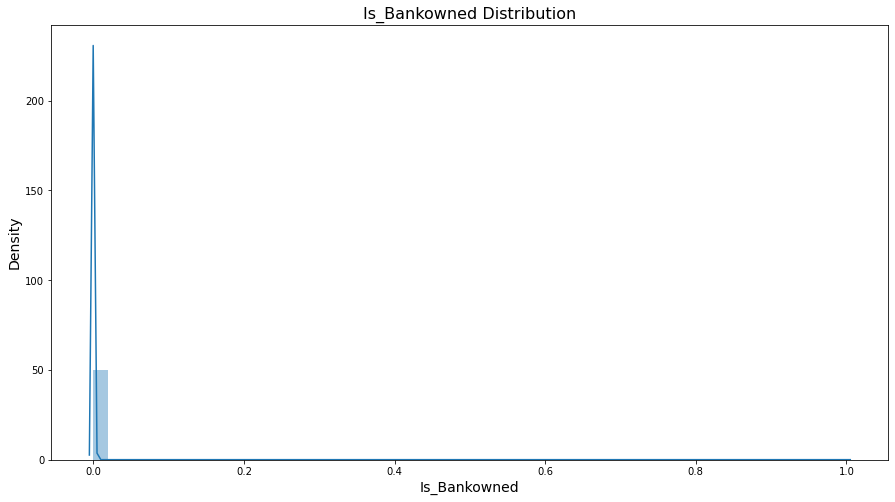

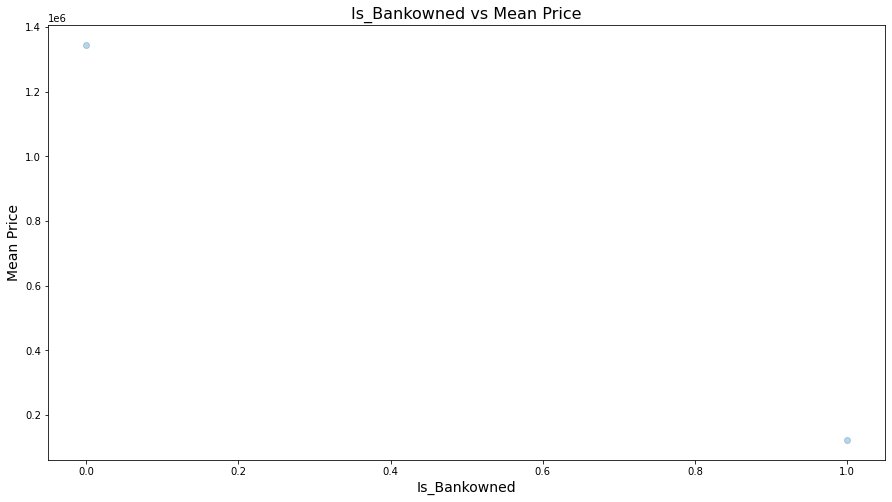

In [268]:
feature_analysis('is_bankOwned')

In [269]:
df_single = df_single[df_single['is_bankOwned'] == 0] #Filtering out houses that are bank owned
df_single['is_bankOwned'].value_counts() #Verifying no more bank owned homes

0    19399
Name: is_bankOwned, dtype: int64

In [270]:
df_single.drop('is_bankOwned', axis=1, inplace=True)  #Dropping the column since they're all non bank owned properties

#### Auction

In [271]:
df_single['is_forAuction'].value_counts(normalize=True) #Seeing how many homes are for auction

0    0.999227
1    0.000773
Name: is_forAuction, dtype: float64

Is_Forauction correlation with price is 0.0224874312231092
0    0.999227
1    0.000773
Name: is_forAuction, dtype: float64
count    19399.000000
mean         0.000773
std          0.027797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_forAuction, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


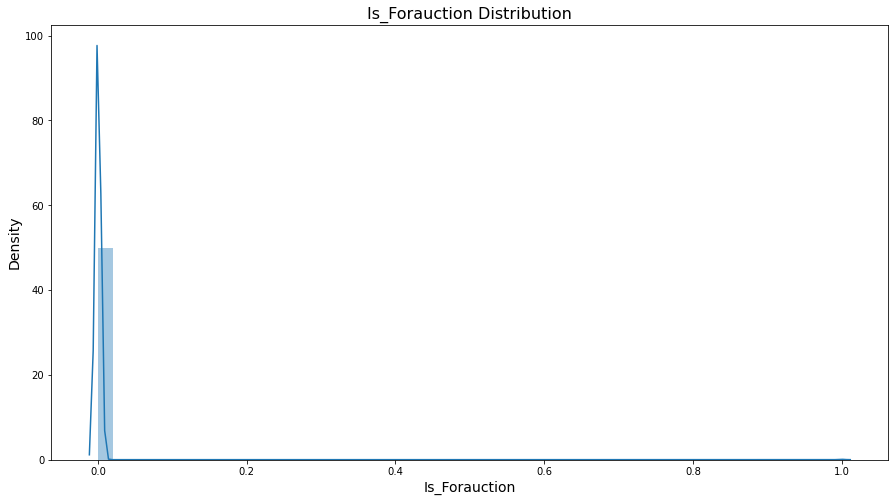

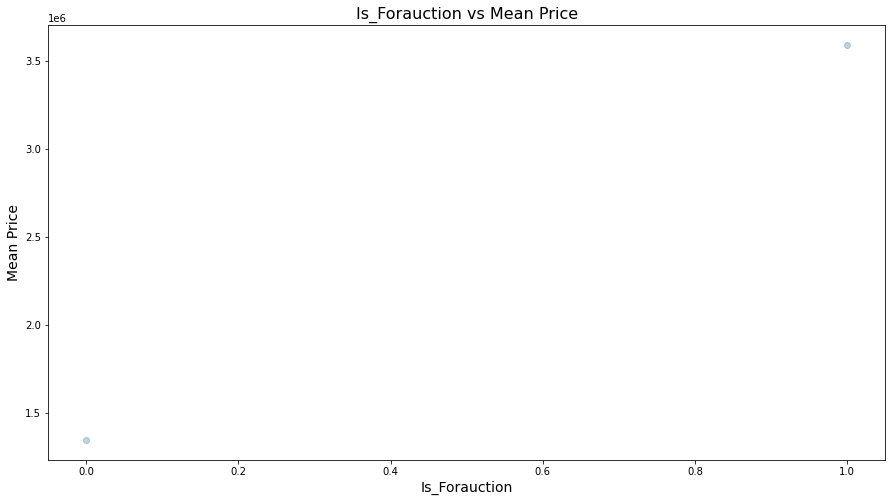

In [272]:
feature_analysis('is_forAuction')

In [273]:
df_single = df_single[df_single['is_forAuction'] == 0] #Filtering out homes for auction
df_single['is_forAuction'].value_counts() #Verifying no more homes for auction

0    19384
Name: is_forAuction, dtype: int64

In [274]:
df_single.drop('is_forAuction', axis=1, inplace=True) #Dropping the column since no homes are for auction

#### Event

In [275]:
df_single['event'].value_counts()

Listed for sale    13950
Price change        2910
Listing removed     1662
Sold                 695
None                 165
Listed for rent        1
Pending sale           1
Name: event, dtype: int64

In [276]:
df_single.drop(['event'], axis=1, inplace=True) #Dropping the event column since we'll be looking at all the houses

#### Bathrooms

In [277]:
df_single['bathrooms'].value_counts()

2.0     7510
3.0     5917
1.0     2319
4.0     1746
5.0      830
6.0      380
0.0      246
7.0      188
8.0      119
9.0       52
10.0      27
11.0      19
12.0      14
14.0       6
13.0       5
15.0       1
25.0       1
20.0       1
58.0       1
21.0       1
22.0       1
Name: bathrooms, dtype: int64

In [278]:
avg_price_bath_single = df_single.groupby('bathrooms')['price'].mean().sort_values(ascending=False)
avg_price_bath_single

bathrooms
25.0    8.500000e+07
21.0    7.800000e+07
22.0    6.500000e+07
20.0    4.800000e+07
58.0    2.900000e+07
13.0    2.870900e+07
12.0    2.461636e+07
14.0    2.083300e+07
11.0    1.981579e+07
10.0    1.428259e+07
9.0     1.196734e+07
8.0     8.727528e+06
7.0     7.074280e+06
6.0     4.388978e+06
15.0    3.895000e+06
5.0     3.079481e+06
4.0     1.899812e+06
0.0     1.415886e+06
3.0     1.092848e+06
2.0     7.511032e+05
1.0     5.967947e+05
Name: price, dtype: float64

Bathrooms correlation with price is 0.5594441216895495
2.0     0.387433
3.0     0.305252
1.0     0.119635
4.0     0.090074
5.0     0.042819
6.0     0.019604
0.0     0.012691
7.0     0.009699
8.0     0.006139
9.0     0.002683
10.0    0.001393
11.0    0.000980
12.0    0.000722
14.0    0.000310
13.0    0.000258
15.0    0.000052
25.0    0.000052
20.0    0.000052
58.0    0.000052
21.0    0.000052
22.0    0.000052
Name: bathrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    19384.000000
mean         2.692788
std          1.490093
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: bathrooms, dtype: float64


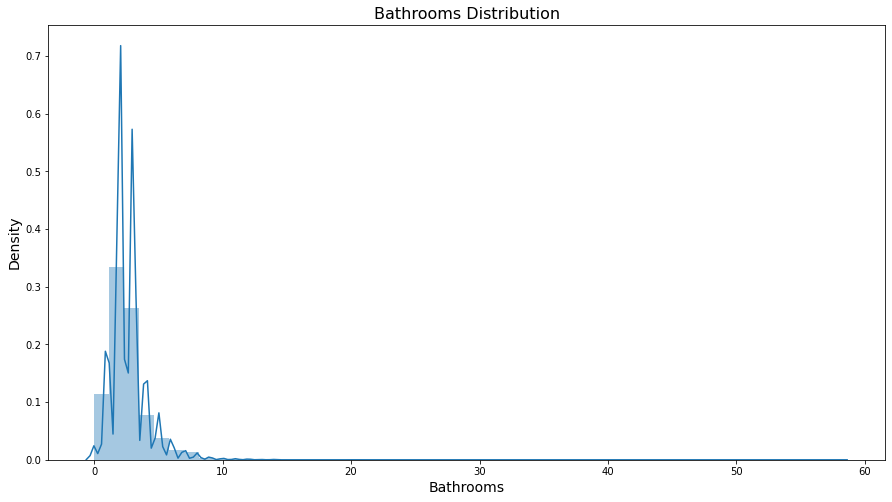

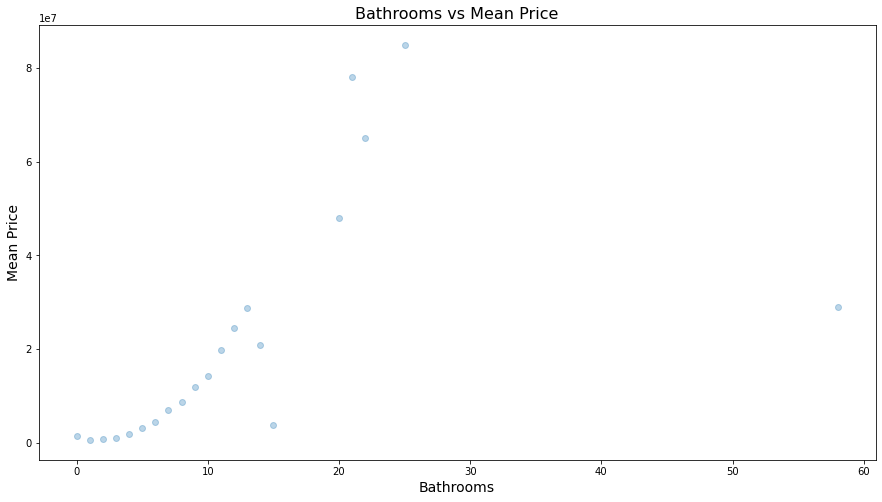

In [279]:
feature_analysis('bathrooms')

In [280]:
df_single = df_single[(df_single['bathrooms'] < 7) & (df_single['bathrooms'] != 0)] #Filtering out homes without bathrooms and more than 7 for the standard home 
df_single['bathrooms'].value_counts()

2.0    7510
3.0    5917
1.0    2319
4.0    1746
5.0     830
6.0     380
Name: bathrooms, dtype: int64

Bathrooms correlation with price is 0.4662293570027178
2.0    0.401561
3.0    0.316383
1.0    0.123997
4.0    0.093359
5.0    0.044380
6.0    0.020319
Name: bathrooms, dtype: float64
count    18702.000000
mean         2.593519
std          1.089099
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: bathrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


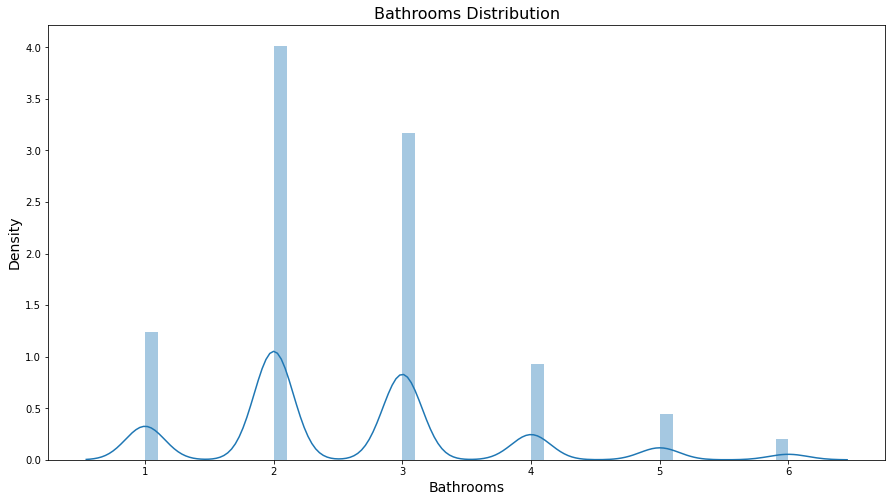

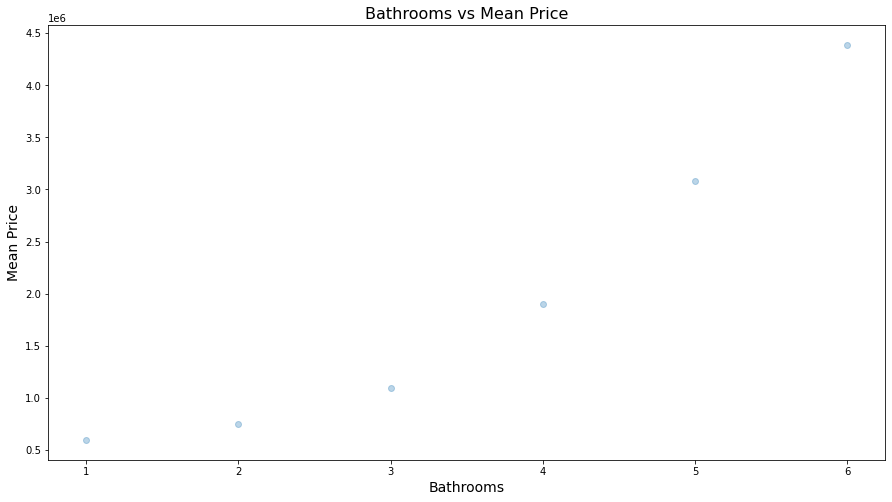

In [281]:
feature_analysis('bathrooms')

#### Bedrooms

In [282]:
df_single['bedrooms'].value_counts(normalize=True)

3.0     0.420169
4.0     0.313603
2.0     0.122073
5.0     0.103251
6.0     0.019089
1.0     0.013368
7.0     0.004385
8.0     0.002032
0.0     0.001016
9.0     0.000588
11.0    0.000160
10.0    0.000107
12.0    0.000107
32.0    0.000053
Name: bedrooms, dtype: float64

In [283]:
avg_price_bed_single = df_single.groupby('bedrooms')['price'].mean().sort_values(ascending=False)
avg_price_bed_single

bedrooms
32.0    7.500000e+06
10.0    2.772500e+06
7.0     2.454135e+06
9.0     2.340681e+06
6.0     2.119226e+06
11.0    2.066333e+06
5.0     1.894839e+06
8.0     1.599076e+06
4.0     1.290027e+06
12.0    1.124000e+06
3.0     8.819851e+05
1.0     7.448648e+05
2.0     7.064301e+05
0.0     6.106152e+05
Name: price, dtype: float64

Bedrooms correlation with price is 0.25256163570311
3.0     0.420169
4.0     0.313603
2.0     0.122073
5.0     0.103251
6.0     0.019089
1.0     0.013368
7.0     0.004385
8.0     0.002032
0.0     0.001016
9.0     0.000588
11.0    0.000160
10.0    0.000107
12.0    0.000107
32.0    0.000053
Name: bedrooms, dtype: float64
count    18702.000000
mean         3.461288
std          1.040012
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         32.000000
Name: bedrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


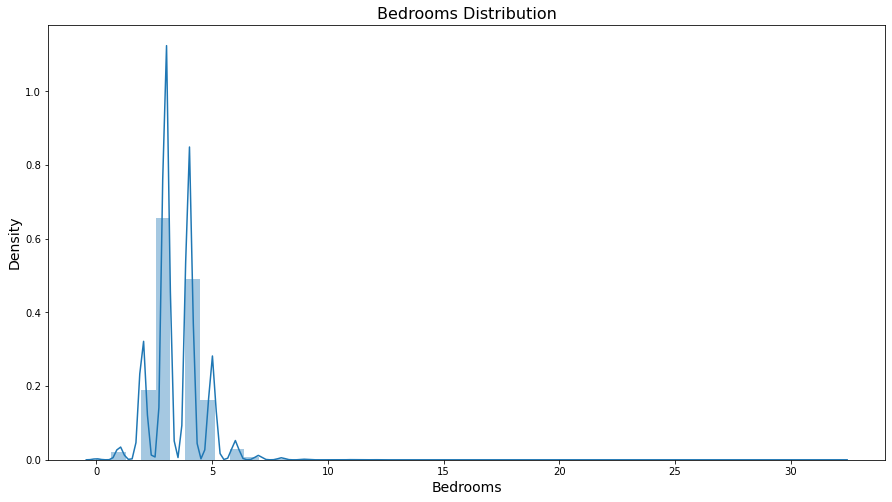

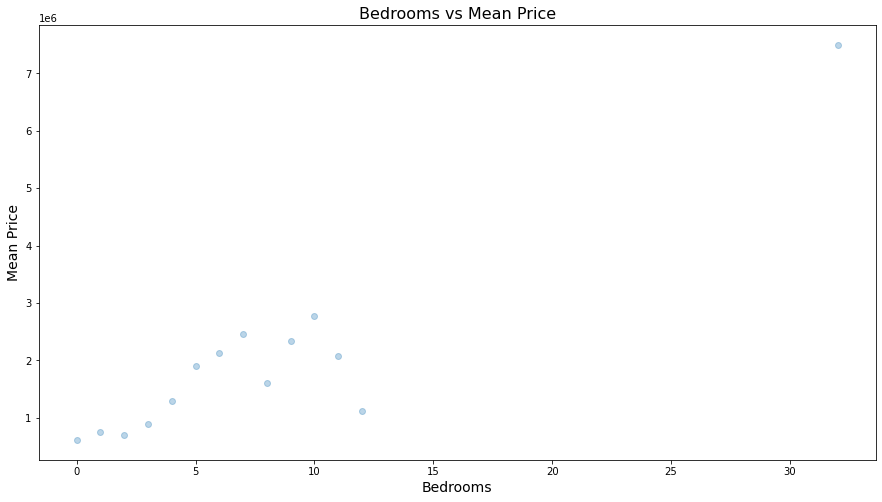

In [284]:
feature_analysis('bedrooms')

In [285]:
df_single = df_single[df_single['bedrooms'] <= 7] #Filtering out houses with more than 7 bedrooms for a standard home
df_single['bedrooms'].value_counts()

3.0    7858
4.0    5865
2.0    2283
5.0    1931
6.0     357
1.0     250
7.0      82
0.0      19
Name: bedrooms, dtype: int64

Bedrooms correlation with price is 0.2546479697444777
3.0    0.421453
4.0    0.314562
2.0    0.122446
5.0    0.103567
6.0    0.019147
1.0    0.013408
7.0    0.004398
0.0    0.001019
Name: bedrooms, dtype: float64
count    18645.000000
mean         3.444409
std          0.979451
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: bedrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


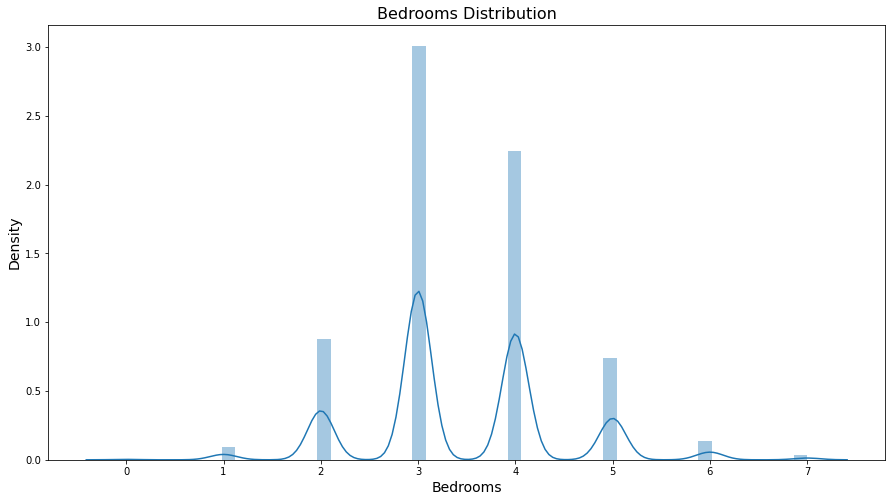

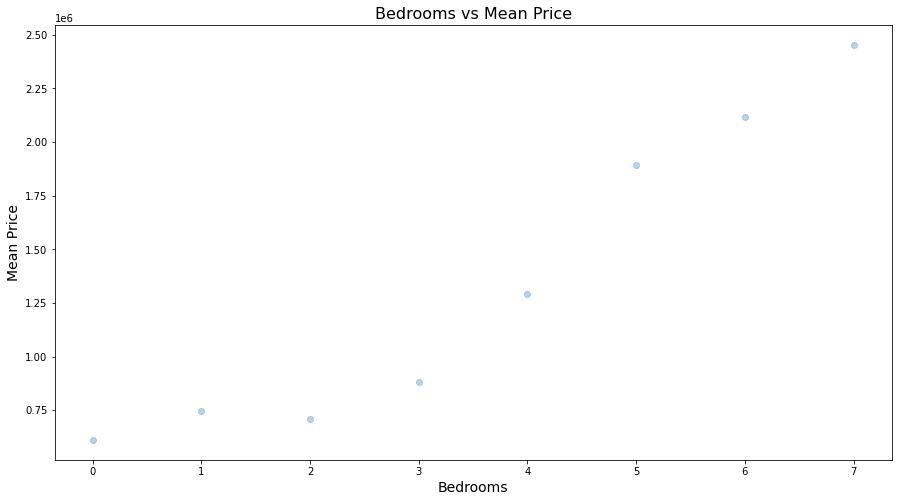

In [286]:
feature_analysis('bedrooms')

In [287]:
#bedroom_outliers = df_single[(df_single['bedrooms'] == 0) & (df_single['price'] > 1000000)]
#bedroom_outliers

In [288]:
#df_single[df_single['bedrooms'] == 0].sort_values('pricePerSquareFoot', ascending=False)

#### Year Built

In [289]:
# imbalanced data set so must deal with it by smote?

In [290]:
len(df_single['yearBuilt'].value_counts().keys())

156

In [291]:
yearBuilt_single = df_single.groupby('yearBuilt')['price'].mean().sort_values(ascending=False)
yearBuilt_single

yearBuilt
1898    3.764500e+06
1859    3.300000e+06
2022    2.906430e+06
1881    2.800000e+06
1885    2.588800e+06
            ...     
1876    5.026293e+05
1870    4.990000e+05
1868    4.990000e+05
1894    4.644500e+05
1856    3.690000e+05
Name: price, Length: 156, dtype: float64

Yearbuilt correlation with price is -0.04389215586649091
2005    0.020113
1950    0.019415
1955    0.018718
2004    0.018289
2021    0.017431
          ...   
9999    0.000054
1897    0.000054
1859    0.000054
1856    0.000054
1865    0.000054
Name: yearBuilt, Length: 156, dtype: float64
count    18645.000000
mean      1948.349906
std        227.731017
min          0.000000
25%       1952.000000
50%       1973.000000
75%       1995.000000
max       9999.000000
Name: yearBuilt, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


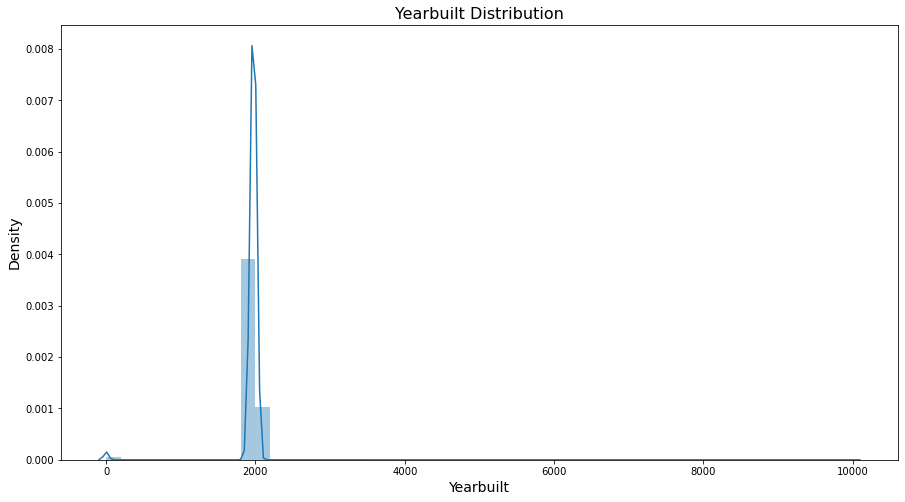

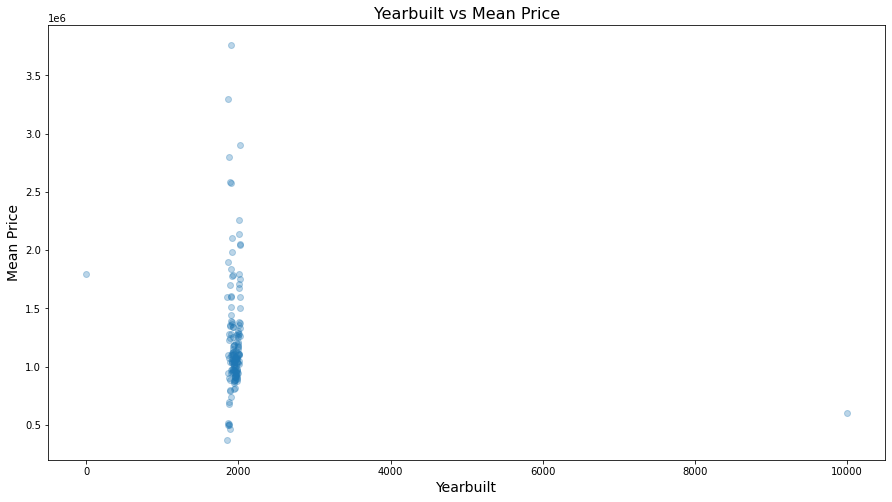

In [292]:
feature_analysis('yearBuilt')

In [293]:
df_single = df_single[(df_single['yearBuilt'] < 2023) & (df_single['yearBuilt'] != 0)]

In [294]:
df_single['yearBuilt']

1        1958
2        1959
3        1908
5        1958
6        2000
         ... 
35379    1925
35381    1926
35384    1927
35385    1924
35388    1971
Name: yearBuilt, Length: 18413, dtype: int64

Yearbuilt correlation with price is 0.060114017348907305
2005    0.020366
1950    0.019660
1955    0.018954
2004    0.018520
2021    0.017651
          ...   
1868    0.000054
1861    0.000054
1879    0.000054
1897    0.000054
1856    0.000054
Name: yearBuilt, Length: 154, dtype: float64
count    18413.000000
mean      1972.355673
std         28.148692
min       1850.000000
25%       1953.000000
50%       1974.000000
75%       1995.000000
max       2022.000000
Name: yearBuilt, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


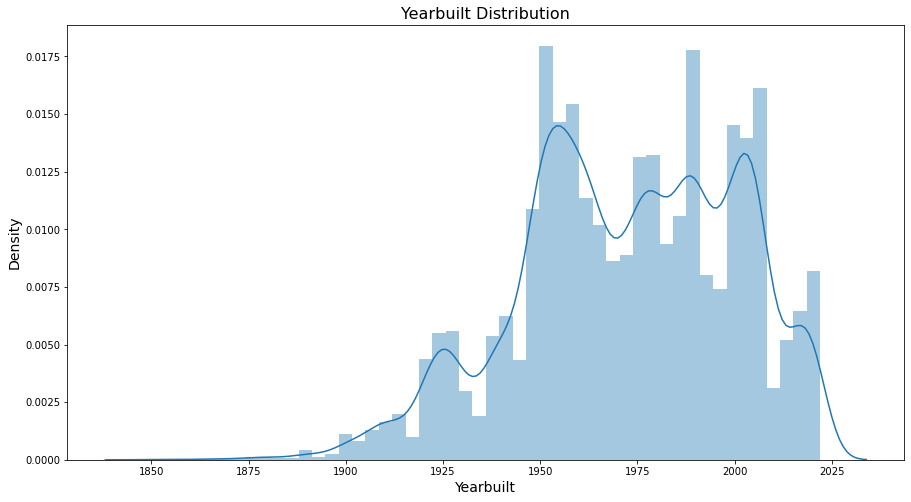

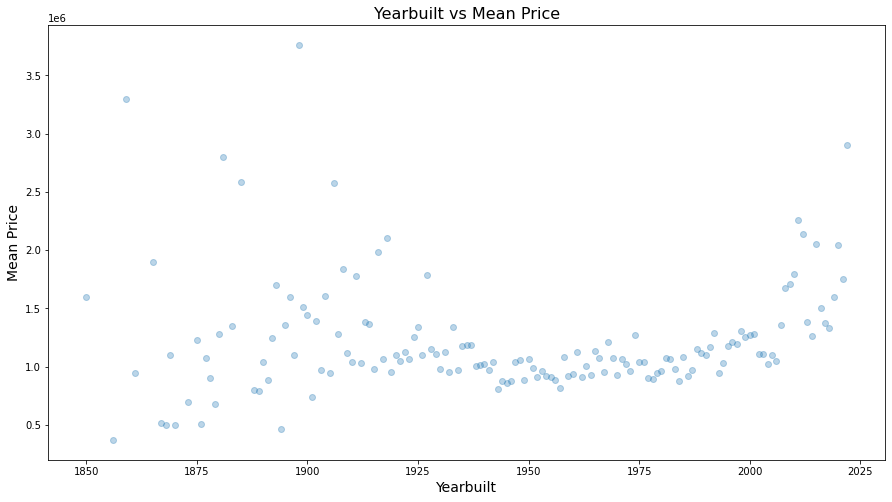

In [295]:
feature_analysis('yearBuilt')

#### Living Area and Living Area Value

In [296]:
df_single['livingArea'].value_counts()

0.0       151
1200.0     92
1500.0     63
1600.0     56
1400.0     53
         ... 
3089.0      1
5471.0      1
743.0       1
3316.0      1
4083.0      1
Name: livingArea, Length: 3847, dtype: int64

In [297]:
np.corrcoef(df_single['livingArea'], df_single['livingAreaValue']) #Checking the correlation between the two variables

array([[1.        , 0.98417256],
       [0.98417256, 1.        ]])

In [298]:
df_single.drop('livingAreaValue', axis=1, inplace=True) #Dropping the redundant variable

Livingarea correlation with price is 0.5086498894795731
0.0       0.008201
1200.0    0.004996
1500.0    0.003421
1600.0    0.003041
1400.0    0.002878
            ...   
3089.0    0.000054
5471.0    0.000054
743.0     0.000054
3316.0    0.000054
4083.0    0.000054
Name: livingArea, Length: 3847, dtype: float64
count    18413.000000
mean      2074.913431
std       1075.348676
min          0.000000
25%       1359.000000
50%       1843.000000
75%       2524.000000
max      20125.000000
Name: livingArea, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


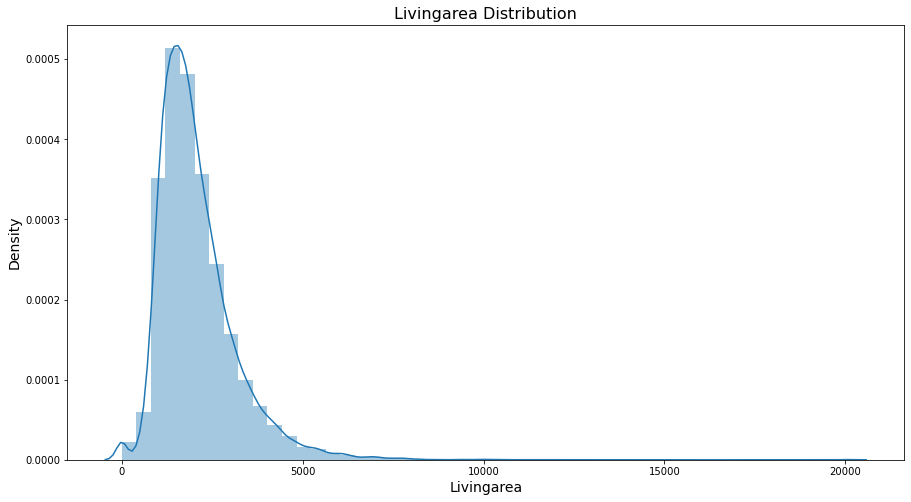

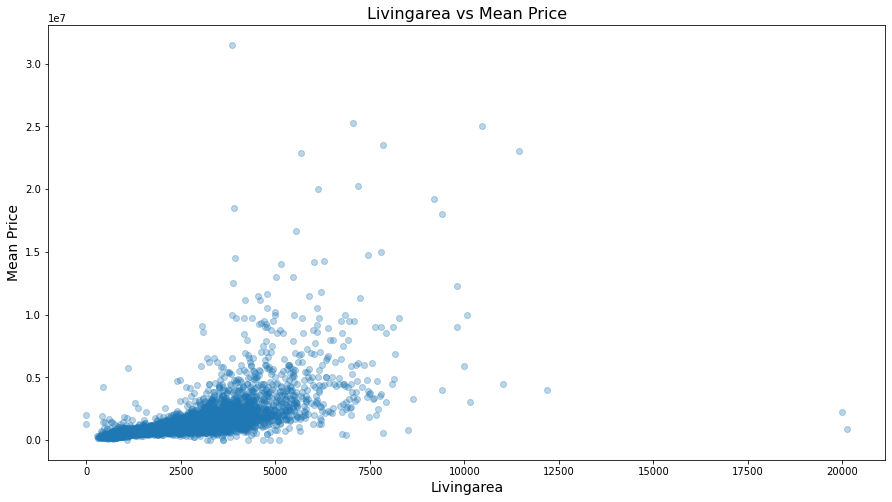

In [299]:
feature_analysis('livingArea')

In [300]:
#df_single[df_single['livingArea'] > 10000]

#### Pool

In [301]:
feature_corr('pool')

Pool correlation with price is 0.15027973699338257


In [302]:
pool = df_single['pool']
y_pool = ['no pool', 'pool']

C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Pool vs No Pool')

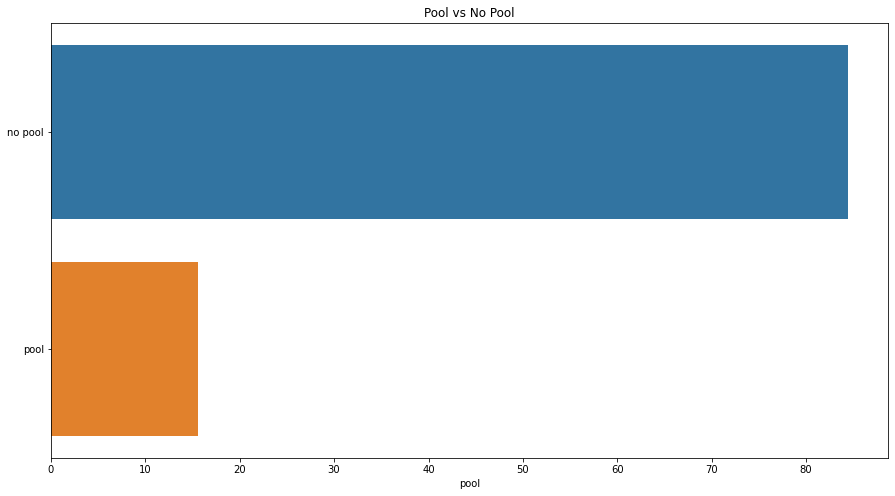

In [303]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(pool.value_counts(normalize=True)*100, y=y_pool, data=df_single, ax=ax)
ax.set_title('Pool vs No Pool')

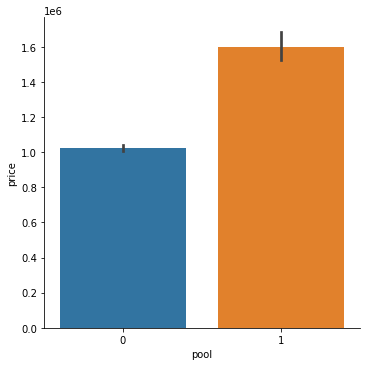

In [304]:
sns.catplot(data=df_single, kind='bar', x='pool', y='price')

#### Has bad Geocode

In [305]:
df_single['hasBadGeocode'].value_counts()

0    18413
Name: hasBadGeocode, dtype: int64

In [306]:
df_single.drop('hasBadGeocode', inplace=True, axis=1)

#### Price Per Square Foot

Pricepersquarefoot correlation with price is 0.026488195952664335
0.0       0.020420
250.0     0.002824
333.0     0.002770
283.0     0.002715
341.0     0.002715
            ...   
2030.0    0.000054
2314.0    0.000054
1476.0    0.000054
2006.0    0.000054
2062.0    0.000054
Name: pricePerSquareFoot, Length: 1705, dtype: float64
count    1.841300e+04
mean     6.489860e+02
std      1.420058e+04
min      0.000000e+00
25%      2.720000e+02
50%      4.150000e+02
75%      6.240000e+02
max      1.775000e+06
Name: pricePerSquareFoot, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


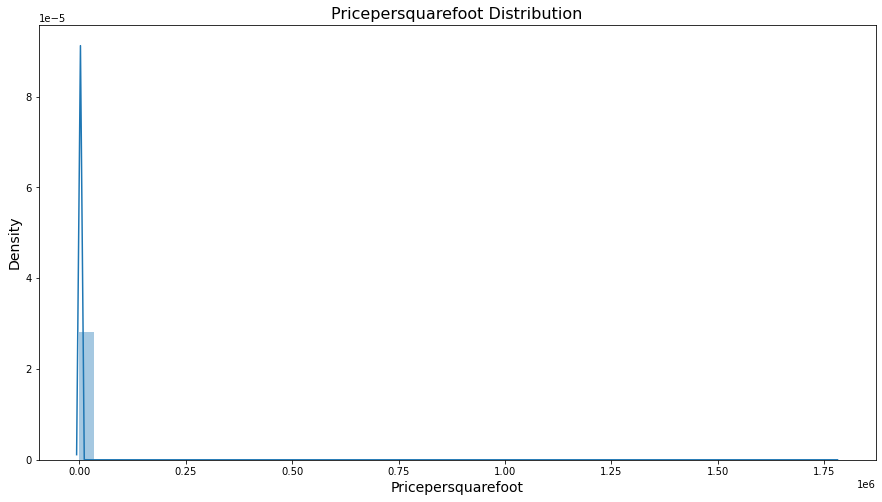

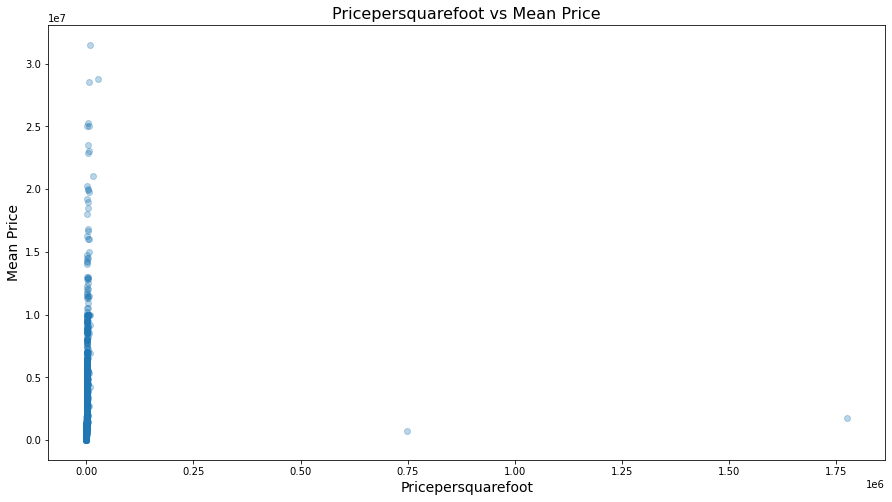

In [307]:
feature_analysis('pricePerSquareFoot')

In [308]:
df_single['pricePerSquareFoot'].value_counts()

0.0       376
250.0      52
333.0      51
283.0      50
341.0      50
         ... 
2030.0      1
2314.0      1
1476.0      1
2006.0      1
2062.0      1
Name: pricePerSquareFoot, Length: 1705, dtype: int64

C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pricePerSquareFoot'>

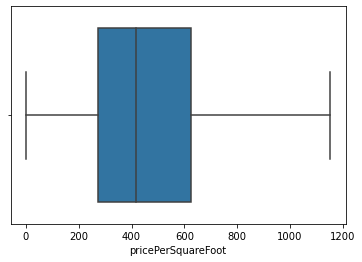

In [309]:
sns.boxplot(df_single['pricePerSquareFoot'], showfliers=False)

In [310]:
df_single = df_single[(df_single['pricePerSquareFoot'] != 0) & (df_single['pricePerSquareFoot'] < 1200)]

C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Pricepersquarefoot correlation with price is 0.6554505890126922
250.0     0.003018
333.0     0.002960
341.0     0.002902
283.0     0.002902
218.0     0.002844
            ...   
120.0     0.000058
5.0       0.000058
1095.0    0.000058
21.0      0.000058
1104.0    0.000058
Name: pricePerSquareFoot, Length: 1145, dtype: float64
count    17231.000000
mean       459.558760
std        238.116157
min          1.000000
25%        275.000000
50%        406.000000
75%        593.500000
max       1199.000000
Name: pricePerSquareFoot, dtype: float64


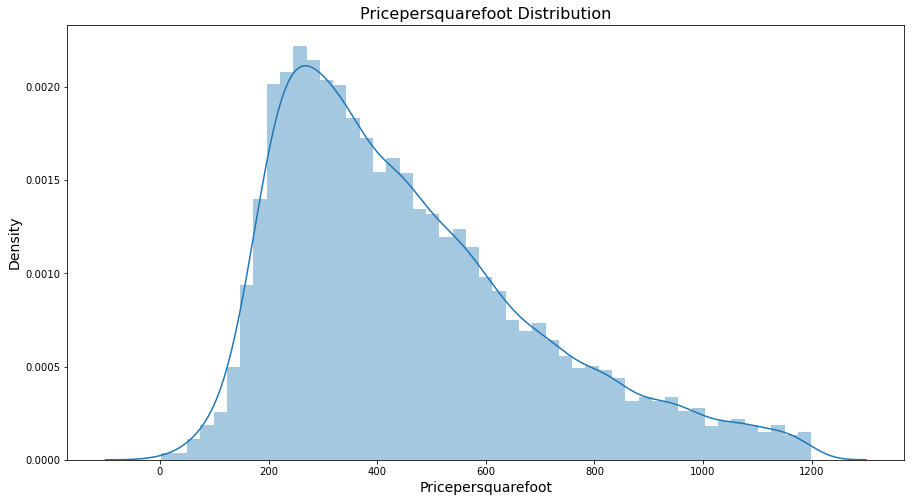

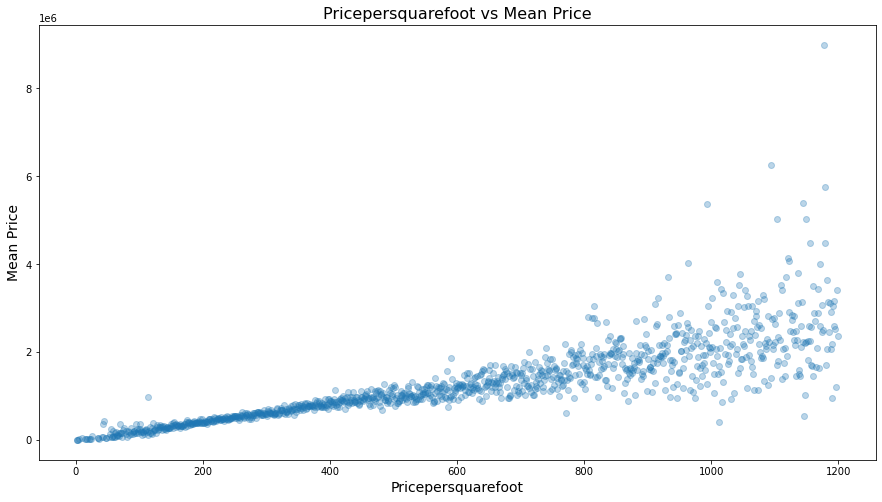

In [311]:
feature_analysis('pricePerSquareFoot')

#### City

In [312]:
df_single['city'].value_counts()[:25] # Here we can observe we will need to deal with the imbalance in the cities

Los Angeles       597
Sacramento        426
San Diego         417
San Jose          321
Bakersfield       211
Fresno            210
Stockton          204
Oakland           171
Riverside         168
Long Beach        147
San Francisco     144
Modesto           138
San Bernardino    136
Santa Rosa        126
Santa Ana          88
Irvine             88
Anaheim            87
Pasadena           84
Redding            83
Oceanside          82
Moreno Valley      81
Escondido          81
Chula Vista        80
Corona             80
Santa Clarita      78
Name: city, dtype: int64

#### Zipcode, Longitude, Latitude

In [313]:
df_single = df_single.drop(['zipcode', 'longitude', 'latitude'], axis=1)
# We can drop these since the city will tell us the same information

In [314]:
df_single.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17231 entries, 1 to 35385
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               17231 non-null  float64
 1   pricePerSquareFoot  17231 non-null  float64
 2   city                17231 non-null  object 
 3   yearBuilt           17231 non-null  int64  
 4   description         17231 non-null  object 
 5   livingArea          17231 non-null  float64
 6   lotAreaUnits        17231 non-null  object 
 7   bathrooms           17231 non-null  float64
 8   bedrooms            17231 non-null  float64
 9   buildingArea        17231 non-null  float64
 10  parking             17231 non-null  int64  
 11  garageSpaces        17231 non-null  float64
 12  hasGarage           17231 non-null  int64  
 13  levels              17231 non-null  object 
 14  pool                17231 non-null  int64  
 15  spa                 17231 non-null  int64  
 16  isNe

#### Lot Area Units

Not sure about this one

In [315]:
df_single['lotAreaUnits'].value_counts()

sqft     11901
Acres     5330
Name: lotAreaUnits, dtype: int64

In [316]:
#df_single[df_single['lotAreaUnits'] == 'Acres']

In [317]:
#df_single[df_single['lotAreaUnits'] == 'sqft']

#### Levels

In [318]:
df_single['levels'].value_counts()

0                                      6106
One                                    5729
Two                                    3524
One Story                               543
Two Story                               474
Three Or More                           284
Multi/Split                             249
Three or More Stories                    44
2                                        42
One-Two                                  40
1                                        40
Tri-Level                                34
Two-Multi/Split                          21
3                                        15
Two Story-Two                            14
Other                                    10
Three                                    10
One-Multi/Split                           9
Two-Three Or More                         8
Three Or More-Multi/Split                 7
One Story-One                             5
Multi/Split-Two                           5
Three or More Stories-Three Or M

In [319]:
df_single.loc[df_single['levels'] == 'One', 'levels'] = 1
df_single.loc[df_single['levels'] == 'One Story', 'levels'] = 1
df_single.loc[df_single['levels'] == 'One-Two', 'levels'] = 1
df_single.loc[df_single['levels'] == 'One Story-One', 'levels'] = 1
df_single.loc[df_single['levels'] == 'One-Multi/Split', 'levels'] = 1
df_single.loc[df_single['levels'] == 'One-', 'levels'] = 1
df_single.loc[df_single['levels'] == '1', 'levels'] = 1

In [320]:
df_single.loc[df_single['levels'] == 'Two', 'levels'] = 2
df_single.loc[df_single['levels'] == 'Two Story', 'levels'] = 2
df_single.loc[df_single['levels'] == '2', 'levels'] = 2
df_single.loc[df_single['levels'] == 'Two-Multi/Split', 'levels'] = 2
df_single.loc[df_single['levels'] == 'Two Story-Two', 'levels'] = 2
df_single.loc[df_single['levels'] == 'Two-Three Or More', 'levels'] = 2
df_single.loc[df_single['levels'] == 'Multi/Split-Two', 'levels'] = 2
df_single.loc[df_single['levels'] == 'Multi/Split', 'levels'] = 2
df_single.loc[df_single['levels'] == 'Split Level', 'levels'] = 2

In [321]:
df_single.loc[df_single['levels'] == 'Three', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Three Or More', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Three Or More Stories', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Tri-Level', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Three Or More-Multi/Split', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Three or More Stories-Three Or More ', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Multi/Split-Three Or More ', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Three or More Stories', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Three or More Stories-Three Or More', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Tri-Level-Two', 'levels'] = 3
df_single.loc[df_single['levels'] == '3', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Multi/Split-Three Or More', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Multi/Split-Tri-Level', 'levels'] = 3
df_single.loc[df_single['levels'] == 'Multi-Level', 'levels'] = 3

In [322]:
df_single.loc[df_single['levels'] == '4+', 'levels'] = 4
df_single.loc[df_single['levels'] == 'Other', 'levels'] = 4

In [323]:
df_single['levels'].value_counts()

1                        6366
0                        6106
2                        4339
3                         402
4                          12
One-Three Or More           2
One-Two-Three Or More       1
Multi/Split-One             1
Two Story-One               1
One-Two-Multi/Split         1
Name: levels, dtype: int64

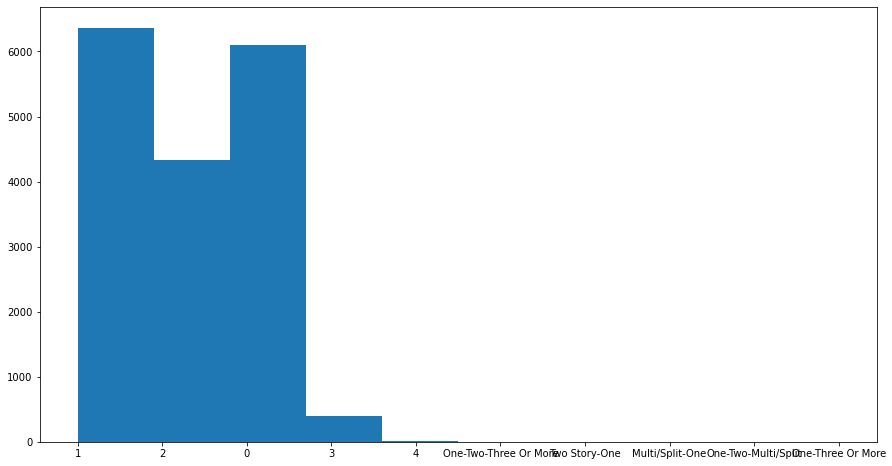

In [324]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df_single['levels']);

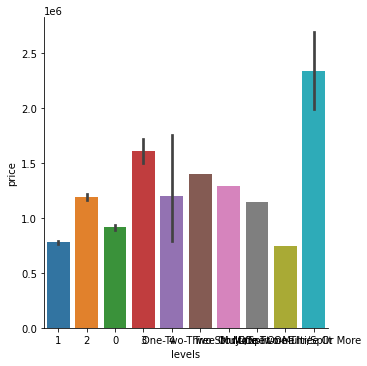

In [325]:
sns.catplot(data=df_single, kind='bar', x='levels', y='price');

#### Parking

In [326]:
df_single['parking'].value_counts()

1    14210
0     3021
Name: parking, dtype: int64

<ipython-input-327-563a2fea4553>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([' ', ' ', 'None', ' ', ' ', ' ', 'Parking'])


[Text(-0.5, 0, ' '),
 Text(-0.25, 0, ' '),
 Text(0.0, 0, 'None'),
 Text(0.25, 0, ' '),
 Text(0.5, 0, ' '),
 Text(0.75, 0, ' '),
 Text(1.0, 0, 'Parking'),
 Text(1.25, 0, ''),
 Text(1.5, 0, '')]

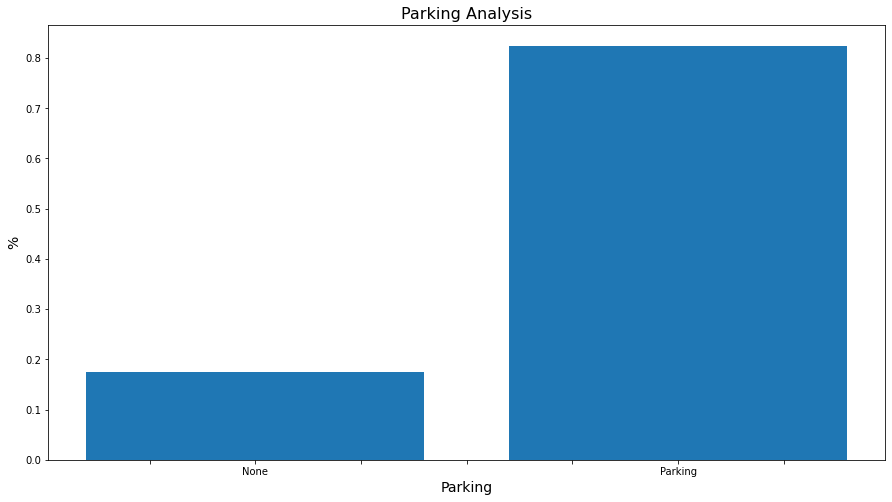

In [327]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(df_single['parking'].value_counts().index, df_single['parking'].value_counts(normalize=True).values)
ax.set_title('Parking Analysis', fontsize=16)
ax.set_xlabel('Parking', fontsize=14)
ax.set_ylabel('%', fontsize=14)
ax.set_xticklabels([' ', ' ', 'None', ' ', ' ', ' ', 'Parking'])

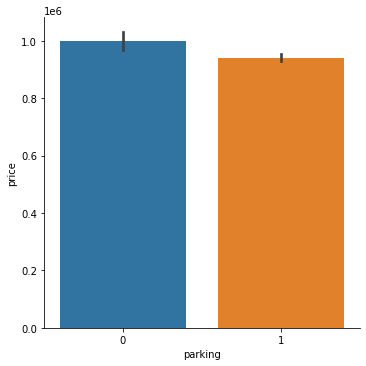

In [328]:
sns.catplot(data=df_single, kind='bar', x='parking', y='price');

In [329]:
df_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17231 entries, 1 to 35385
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               17231 non-null  float64
 1   pricePerSquareFoot  17231 non-null  float64
 2   city                17231 non-null  object 
 3   yearBuilt           17231 non-null  int64  
 4   description         17231 non-null  object 
 5   livingArea          17231 non-null  float64
 6   lotAreaUnits        17231 non-null  object 
 7   bathrooms           17231 non-null  float64
 8   bedrooms            17231 non-null  float64
 9   buildingArea        17231 non-null  float64
 10  parking             17231 non-null  int64  
 11  garageSpaces        17231 non-null  float64
 12  hasGarage           17231 non-null  int64  
 13  levels              17231 non-null  object 
 14  pool                17231 non-null  int64  
 15  spa                 17231 non-null  int64  
 16  isNe

####  Garage Spaces and has garage

In [330]:
df_single['garageSpaces'].value_counts()

0.0     7055
2.0     7004
3.0     1702
1.0     1077
4.0      277
5.0       45
6.0       40
8.0        9
10.0       6
7.0        6
12.0       4
13.0       1
22.0       1
9.0        1
15.0       1
18.0       1
16.0       1
Name: garageSpaces, dtype: int64

Garagespaces correlation with price is 0.20687565451655
0.0     0.409436
2.0     0.406477
3.0     0.098775
1.0     0.062504
4.0     0.016076
5.0     0.002612
6.0     0.002321
8.0     0.000522
10.0    0.000348
7.0     0.000348
12.0    0.000232
13.0    0.000058
22.0    0.000058
9.0     0.000058
15.0    0.000058
18.0    0.000058
16.0    0.000058
Name: garageSpaces, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    17231.000000
mean         1.281353
std          1.244885
min          0.000000
25%          0.000000
50%          2.000000
75%          2.000000
max         22.000000
Name: garageSpaces, dtype: float64


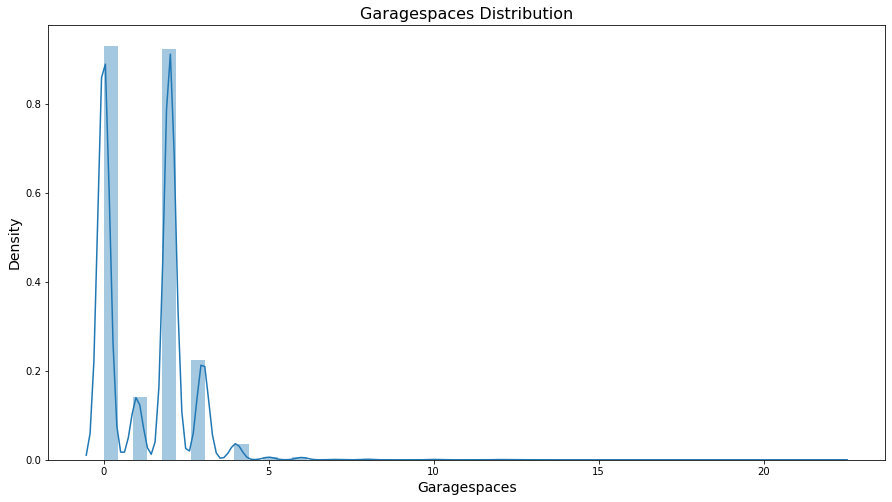

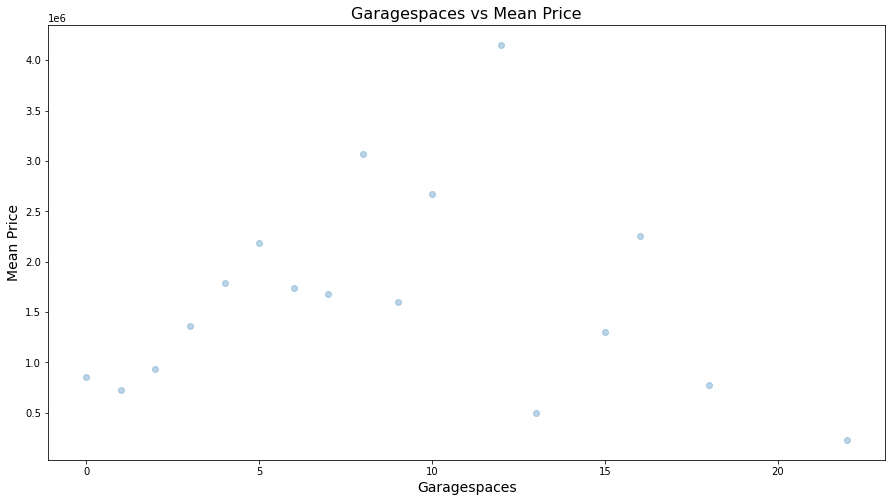

In [331]:
feature_analysis('garageSpaces')

In [333]:
df_single = df_single[df_single['garageSpaces'] < 5]

Garagespaces correlation with price is 0.1814218813103338
0.0    0.412212
2.0    0.409232
3.0    0.099445
1.0    0.062927
4.0    0.016185
Name: garageSpaces, dtype: float64
count    17115.000000
mean         1.244464
std          1.142453
min          0.000000
25%          0.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: garageSpaces, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


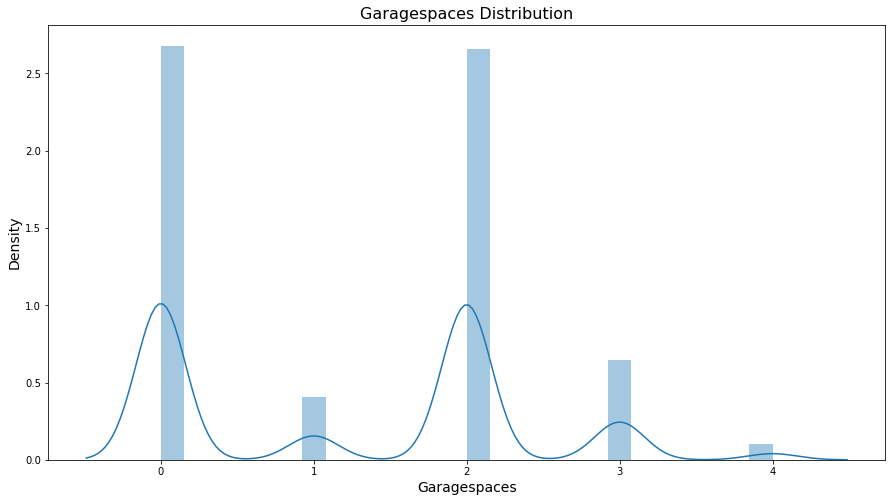

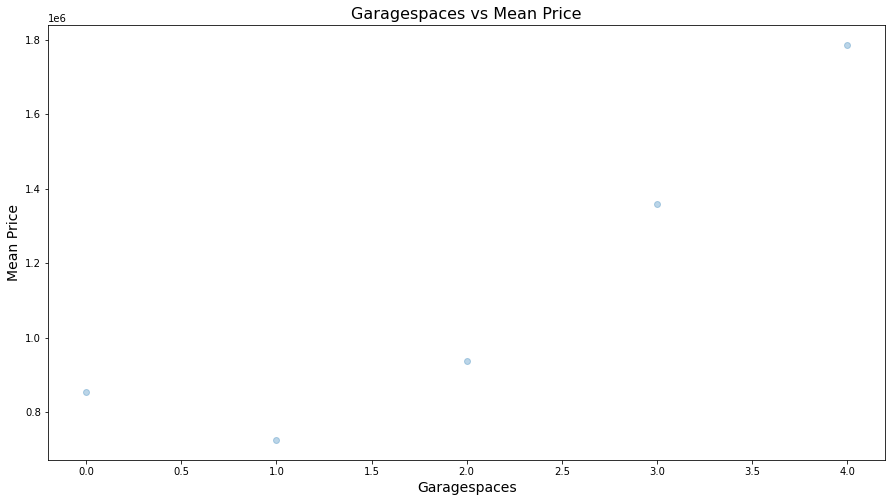

In [334]:
feature_analysis('garageSpaces')

In [ ]:
df_single['hasGarage'].corr()

In [ ]:
df_single.drop('hasGarage', inplace=True, axis=1)

#### Target: Popularity Analysis

In [ ]:
df['price'].describe()

In [ ]:
df['price'].value_counts(bins=8)

In [ ]:
df_single['price'].max()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df_single['price'], bins=50);

In [ ]:
#Boxplot with outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df_single['price'], showmeans=True, meanline=True);

In [ ]:
#Boxplot without outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df_single['price'], showfliers=False);

In [ ]:
sns.displot(df_single['price'], height=7, aspect=2);

In [ ]:
pop_corr = abs(df_single.corr()[['price']]).sort_values('price', ascending=False) #Correlation analysis against price
pop_corr

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pop_corr, ax=ax, annot=True)
ax.set_yticklabels(labels=pop_corr.index, fontsize=12);

## Data Preparation

Some variables were dropped and we filtered out many of the outliers that did not make sense for our use case.

#### Splitting the Target and Predictors

In [ ]:
X = df_single.drop('price', axis=1)
y = df_single['price']

In [ ]:
df_single.info()

#### Splitting the Training Set and Validation Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

## Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initiating dictionaries for mse and r2 scores
scores = {}
r2_scores = {}

In [ ]:
# A function to add the scores from cross validation
def cv_scores(model, model_name):
    model_mse = model['test_neg_mean_squared_error'].mean()
    scores[model_name] = model_mse
    
    model_r2 = model['test_r2'].mean()
    r2_scores[model_name] = model_r2
    
    print(f'{model_name} Train MSE: {model_mse}')
    print(f'{model_name} Train R2: {model_r2}')

In [ ]:
# Function to add scores from metrics mean_squared_error and r2_score
def train_scores(model, X, model_name):
    model_preds = model.predict(X)
    
    model_mse = -mean_squared_error(y_train, model_preds)
    scores[model_name] = model_mse
    
    model_r2 = r2_score(y_train, model_preds)
    r2_scores[model_name] = model_r2
    
    print(f'{model_name} Train MSE: {model_mse}')
    print(f'{model_name} Train R2: {model_r2}')

In [ ]:
# Stratified K Fold parameters
stratified_kfold = StratifiedKFold(n_splits=5, 
                                   random_state=42, 
                                   shuffle=True)

#### First simple Model with Bedrooms

In [ ]:
X_train_br = X_train[['bedrooms']]

In [ ]:
lr_br = LinearRegression()

In [ ]:
lr_br.fit(X_train_br, y_train)

In [ ]:
base_cv = cross_validate(lr_br,
                         X_train_br,
                         y_train,
                         #cv=stratified_kfold,
                         scoring=['neg_mean_squared_error', 'r2'])

In [ ]:
cv_scores(base_cv, model_name='Base Bedrooms')

#### Second simple model with Living Area

In [ ]:
X_train_livingarea = X_train[['livingArea']]
lr_livingarea = LinearRegression()

In [ ]:
lr_livingarea.fit(X_train_livingarea, y_train)

In [ ]:
livingarea_cv = cross_validate(lr_livingarea,
                               X_train_livingarea,
                               y_train,
                               scoring=['neg_mean_squared_error', 'r2'])

In [ ]:
cv_scores(livingarea_cv, model_name='Living Area')

#### Third simple model with Bathrooms

In [ ]:
X_train_bathrooms = X_train[['bathrooms']]
lr_bathrooms = LinearRegression()

In [ ]:
lr_bathrooms.fit(X_train_bathrooms, y_train)

In [ ]:
bathrooms_cv = cross_validate(lr_bathrooms,
                              X_train_bathrooms,
                              y_train,
                              scoring=['neg_mean_squared_error', 'r2'])

In [ ]:
cv_scores(bathrooms_cv, model_name='Bathrooms')

In [ ]:
X_train_top3 = X_train[['livingArea', 'bathrooms', 'bedrooms']]
lr_top3 = LinearRegression()

In [ ]:
lr_top3.fit(X_train_top3, y_train)

In [ ]:
top3_cv = cross_validate(lr_top3,
                         X_train_top3,
                         y_train,
                         scoring=['neg_mean_squared_error', 'r2'])

In [ ]:
cv_scores(top3_cv, model_name='Top 3 Features')